Great Learning Hackathon 2022
DHDL_ltd
Using Machine learning to understand which parameters play an important role in determining whether a client will DEFAULT or NOT in loans.

In [292]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import pathlib

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [293]:
#Finding the path of the datasets
df_csv_filepaths = sorted(
    str(p)
    for p in pathlib.Path("C:\\Users\A109019\\OneDrive - yuteh.ntpc.edu.tw\\Documents\\Personal_Data\\OnlineDS\\Jupyter_Notebooks\\Hackaton").glob(
        "*.csv"
    ))

<IPython.core.display.Javascript object>

In [294]:
# Showing the name of each dataset files
df_csv_filepaths[:]

['C:\\Users\\A109019\\OneDrive - yuteh.ntpc.edu.tw\\Documents\\Personal_Data\\OnlineDS\\Jupyter_Notebooks\\Hackaton\\Data_Dictionary_(1)_(1)_(1).csv',
 'C:\\Users\\A109019\\OneDrive - yuteh.ntpc.edu.tw\\Documents\\Personal_Data\\OnlineDS\\Jupyter_Notebooks\\Hackaton\\Sample_Submission_(2).csv',
 'C:\\Users\\A109019\\OneDrive - yuteh.ntpc.edu.tw\\Documents\\Personal_Data\\OnlineDS\\Jupyter_Notebooks\\Hackaton\\Test_set.csv',
 'C:\\Users\\A109019\\OneDrive - yuteh.ntpc.edu.tw\\Documents\\Personal_Data\\OnlineDS\\Jupyter_Notebooks\\Hackaton\\Train_set.csv']

<IPython.core.display.Javascript object>

In [295]:
datadictionary = pd.read_csv('Data_Dictionary_(1)_(1)_(1).csv')

<IPython.core.display.Javascript object>

In [296]:
#Provided information in the Hackathon competition
datadictionary.head()

,ID,unique ID assigned to each applicant
0,loan_amnt,loan amount ($) applied each applicant
1,loan_term,Loan duration in years
2,interest_rate,Applicable interest rate on Loan in %
3,loan_grade,Loan Grade Assigned by the bank
4,loan_subgrade,Loan SubGrade Assigned by the bank


<IPython.core.display.Javascript object>

In [297]:
submit = pd.read_csv('Sample_Submission_(2).csv')

<IPython.core.display.Javascript object>

In [298]:
#It's the sample submission that the participant should follow. 
submit.head()

,ID,default
0,4855329,1
1,66862420,0
2,3637416,0
3,53682249,1
4,53937165,0


<IPython.core.display.Javascript object>

In [299]:
# Loading and reading the dataset

loantrain = pd.read_csv(
    "C:\\Users\A109019\\OneDrive - yuteh.ntpc.edu.tw\\Documents\\Personal_Data\\OnlineDS\\Jupyter_Notebooks\\Hackaton\\Train_set.csv"
)
loantest = pd.read_csv(
    "C:\\Users\A109019\\OneDrive - yuteh.ntpc.edu.tw\\Documents\\Personal_Data\\OnlineDS\\Jupyter_Notebooks\\Hackaton\\Test_set.csv"
)

<IPython.core.display.Javascript object>

In [300]:
#Making copies of the datasets to keep originals
df_train = loantrain.copy()
df_test = loantest.copy()

<IPython.core.display.Javascript object>

In [301]:
print("The shape of the rows and columns in train is:", df_train.shape)
print("The shape of the rows and columns in test is:", df_test.shape)

The shape of the rows and columns in train is: (93174, 23)
The shape of the rows and columns in test is: (39933, 22)


<IPython.core.display.Javascript object>

In [302]:
loantrain = pd.read_csv('Train_set.csv')

<IPython.core.display.Javascript object>

In [303]:
loantrain.shape

(93174, 23)

<IPython.core.display.Javascript object>

In [304]:
loantest = pd.read_csv('Test_set.csv')

<IPython.core.display.Javascript object>

In [305]:
loantest.shape

(39933, 22)

<IPython.core.display.Javascript object>

In [306]:
loantrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

<IPython.core.display.Javascript object>

In [307]:
loantrain.head(5)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.170,B,B2,<5 Years,OWN,85000.000,Not Verified,debt_consolidation,NC,26.680,0.000,0.000,39519,20.000,59.600,INDIVIDUAL,4.000,95493.000,84100.000,0
1,14257956,18000,3 years,13.650,C,C1,<5 Years,OWN,64000.000,Verified,debt_consolidation,SC,31.670,0.000,1.000,9783,24.000,3348.250,INDIVIDUAL,95.000,185433.000,13500.000,0
2,66216451,16000,3 years,7.260,A,A4,<5 Years,MORTGAGE,150000.000,Source Verified,debt_consolidation,TX,19.700,2.000,0.000,13641,27.000,276.690,INDIVIDUAL,13.000,180519.000,19300.000,0
3,46974169,25000,3 years,13.990,C,C4,NaN,MORTGAGE,59800.000,Verified,debt_consolidation,MO,37.390,0.000,0.000,35020,35.000,1106.720,INDIVIDUAL,17.000,183208.000,55400.000,0
4,46725961,17000,3 years,6.390,A,A2,10+ years,MORTGAGE,72000.000,Source Verified,credit_card,TX,8.920,0.000,0.000,23990,26.000,725.290,INDIVIDUAL,39.000,23990.000,81300.000,0


<IPython.core.display.Javascript object>

In [308]:
loantrain.tail(5)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
93169,65577252,3200,3 years,7.260,A,A4,<5 Years,RENT,85000.000,Not Verified,debt_consolidation,FL,17.110,0.000,0.000,7924,38.000,55.340,INDIVIDUAL,13.000,64635.000,47600.000,0
93170,836021,3500,3 years,5.420,A,A1,NaN,MORTGAGE,57550.000,Not Verified,other,FL,22.640,0.000,0.000,10174,24.000,299.670,INDIVIDUAL,161.000,NaN,NaN,1
93171,33058720,8000,3 years,13.980,C,C3,10+ years,RENT,148531.500,Source Verified,credit_card,AK,13.040,1.000,0.000,5391,25.000,1150.580,INDIVIDUAL,65.000,94596.000,6500.000,0
93172,4060472,35000,3 years,17.770,D,D1,<5 Years,RENT,100000.000,Verified,debt_consolidation,CA,17.220,0.000,0.000,24609,45.000,5764.580,INDIVIDUAL,56.000,33759.000,34900.000,1
93173,3628127,10000,3 years,15.800,C,C3,<5 Years,RENT,60000.000,Verified,debt_consolidation,NJ,11.830,0.000,0.000,11285,7.000,2279.360,INDIVIDUAL,104.000,25594.000,12300.000,0


<IPython.core.display.Javascript object>

In [309]:
#Replacing years in the column, "loan_term" to have numeric values
loantrain['loan_term'] = loantrain['loan_term'].str.replace('years', "")

<IPython.core.display.Javascript object>

In [310]:
#Replacing < in the column, "job_experience" to have numeric values
loantrain['job_experience'] = loantrain['job_experience'].str.replace('<', "")

<IPython.core.display.Javascript object>

In [311]:
#Replacing Years with years in the column, "job_experience" to have numeric values
loantrain['job_experience'] = loantrain['job_experience'].str.replace('Years', "years")


<IPython.core.display.Javascript object>

In [312]:
#Replacing years in the column, "job_experience" to have numeric values
loantrain['job_experience'] = loantrain['job_experience'].str.replace('years', "")

<IPython.core.display.Javascript object>

In [313]:
#Replacing + in the column, "job_experience" to have numeric values
loantrain['job_experience'] = loantrain['job_experience'].str.replace('+', "")

<IPython.core.display.Javascript object>

In [314]:
#Replacing 6-10 in the column, "job_experience" with median numeric values
loantrain['job_experience'] = loantrain['job_experience'].str.replace('6-10', "8")

<IPython.core.display.Javascript object>

In [315]:
loantrain.head(10)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3,9.170,B,B2,5,OWN,85000.000,Not Verified,debt_consolidation,NC,26.680,0.000,0.000,39519,20.000,59.600,INDIVIDUAL,4.000,95493.000,84100.000,0
1,14257956,18000,3,13.650,C,C1,5,OWN,64000.000,Verified,debt_consolidation,SC,31.670,0.000,1.000,9783,24.000,3348.250,INDIVIDUAL,95.000,185433.000,13500.000,0
2,66216451,16000,3,7.260,A,A4,5,MORTGAGE,150000.000,Source Verified,debt_consolidation,TX,19.700,2.000,0.000,13641,27.000,276.690,INDIVIDUAL,13.000,180519.000,19300.000,0
3,46974169,25000,3,13.990,C,C4,NaN,MORTGAGE,59800.000,Verified,debt_consolidation,MO,37.390,0.000,0.000,35020,35.000,1106.720,INDIVIDUAL,17.000,183208.000,55400.000,0
4,46725961,17000,3,6.390,A,A2,10,MORTGAGE,72000.000,Source Verified,credit_card,TX,8.920,0.000,0.000,23990,26.000,725.290,INDIVIDUAL,39.000,23990.000,81300.000,0
5,56469197,10000,3,12.690,C,C2,5,OWN,56000.000,Not Verified,debt_consolidation,IL,16.160,0.000,1.000,6643,48.000,590.500,INDIVIDUAL,26.000,24054.000,25167.000,0
6,3409695,15000,3,11.140,B,B2,10,RENT,100000.000,Not Verified,debt_consolidation,TX,10.510,0.000,1.000,14088,14.000,1020.570,INDIVIDUAL,35.000,14519.000,15200.000,1
7,26276447,10000,3,6.490,A,A2,10,MORTGAGE,109000.000,Not Verified,credit_card,NY,10.840,1.000,0.000,12337,26.000,728.680,INDIVIDUAL,74.000,210751.000,18600.000,0
8,48393405,12000,3,10.990,B,B4,5,RENT,45000.000,Verified,credit_card,CT,8.210,0.000,0.000,10550,12.000,879.150,INDIVIDUAL,39.000,10550.000,22000.000,0
9,15140624,7000,3,12.490,B,B4,5,MORTGAGE,53000.000,Not Verified,debt_consolidation,TX,18.840,0.000,0.000,12108,20.000,1186.800,INDIVIDUAL,96.000,145801.000,16800.000,0


<IPython.core.display.Javascript object>

In [316]:
loantrain.tail(10)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
93164,22422347,22000,5,17.570,D,D4,10,RENT,120000.000,Source Verified,debt_consolidation,IL,15.090,3.000,0.000,18851,32.000,5236.900,INDIVIDUAL,78.000,36619.000,26600.000,0
93165,5257519,18000,5,15.800,C,C3,5,MORTGAGE,60000.000,Verified,credit_card,MI,26.960,0.000,0.000,15494,22.000,6228.140,INDIVIDUAL,144.000,54592.000,21606.000,0
93166,72107466,13000,3,12.590,C,C2,8,RENT,50000.000,Source Verified,debt_consolidation,CA,38.210,0.000,0.000,19071,19.000,0.000,INDIVIDUAL,NaN,61289.000,29000.000,0
93167,53312784,7800,3,12.290,C,C1,NaN,MORTGAGE,21000.000,Verified,debt_consolidation,NY,12.970,0.000,0.000,8197,8.000,479.810,INDIVIDUAL,31.000,93130.000,17200.000,0
93168,5819825,23850,5,21.000,E,E2,10,MORTGAGE,90000.000,Verified,home_improvement,NC,19.720,0.000,1.000,9954,10.000,10977.490,INDIVIDUAL,139.000,74395.000,12200.000,0
93169,65577252,3200,3,7.260,A,A4,5,RENT,85000.000,Not Verified,debt_consolidation,FL,17.110,0.000,0.000,7924,38.000,55.340,INDIVIDUAL,13.000,64635.000,47600.000,0
93170,836021,3500,3,5.420,A,A1,NaN,MORTGAGE,57550.000,Not Verified,other,FL,22.640,0.000,0.000,10174,24.000,299.670,INDIVIDUAL,161.000,NaN,NaN,1
93171,33058720,8000,3,13.980,C,C3,10,RENT,148531.500,Source Verified,credit_card,AK,13.040,1.000,0.000,5391,25.000,1150.580,INDIVIDUAL,65.000,94596.000,6500.000,0
93172,4060472,35000,3,17.770,D,D1,5,RENT,100000.000,Verified,debt_consolidation,CA,17.220,0.000,0.000,24609,45.000,5764.580,INDIVIDUAL,56.000,33759.000,34900.000,1
93173,3628127,10000,3,15.800,C,C3,5,RENT,60000.000,Verified,debt_consolidation,NJ,11.830,0.000,0.000,11285,7.000,2279.360,INDIVIDUAL,104.000,25594.000,12300.000,0


<IPython.core.display.Javascript object>

In [317]:
#I observe there is no target variable (Default or not)
loantest.head(5)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.310,C,C2,<5 Years,MORTGAGE,73400.000,Not Verified,debt_consolidation,CA,14.620,0.000,0.000,22156,30.000,2290.240,INDIVIDUAL,87.000,128098.000,25800.000
1,66862420,12000,3 years,7.260,A,A4,10+ years,MORTGAGE,105000.000,Not Verified,credit_card,VA,11.380,0.000,0.000,7592,14.000,202.680,INDIVIDUAL,13.000,269396.000,23600.000
2,3637416,15000,3 years,14.330,C,C1,6-10 years,MORTGAGE,50000.000,Verified,debt_consolidation,TX,28.150,0.000,1.000,17983,19.000,1166.240,INDIVIDUAL,30.000,220135.000,34100.000
3,53682249,12000,3 years,9.990,B,B3,6-10 years,RENT,37000.000,Source Verified,credit_card,NJ,34.320,0.000,0.000,12262,18.000,635.060,INDIVIDUAL,35.000,39436.000,21700.000
4,53937165,20150,3 years,11.530,B,B5,<5 Years,RENT,75000.000,Source Verified,debt_consolidation,CA,26.740,1.000,0.000,8251,11.000,1232.840,INDIVIDUAL,31.000,52764.000,12000.000


<IPython.core.display.Javascript object>

In [318]:
loantest.tail(5)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
39928,57779318,5000,3 years,8.180,B,B1,10+ years,MORTGAGE,65000.000,Source Verified,home_improvement,MI,13.090,0.000,5.000,6731,24.000,187.270,INDIVIDUAL,26.000,14422.000,26100.000
39929,59742362,1800,3 years,11.530,B,B5,6-10 years,MORTGAGE,55000.000,Source Verified,home_improvement,AZ,25.440,0.000,1.000,11092,38.000,81.240,INDIVIDUAL,26.000,243469.000,29200.000
39930,72657145,15200,3 years,13.440,C,C3,10+ years,MORTGAGE,78000.000,Not Verified,credit_card,TX,19.400,0.000,0.000,19688,26.000,0.000,INDIVIDUAL,NaN,145370.000,45400.000
39931,15220189,14425,5 years,18.920,D,D4,<5 Years,MORTGAGE,38000.000,Not Verified,credit_card,IN,17.400,0.000,1.000,10805,29.000,4268.800,INDIVIDUAL,96.000,106449.000,19700.000
39932,21810584,27000,5 years,20.200,E,E3,<5 Years,MORTGAGE,62000.000,Source Verified,debt_consolidation,FL,24.120,1.000,0.000,17795,17.000,7436.410,INDIVIDUAL,78.000,55787.000,33500.000


<IPython.core.display.Javascript object>

In [319]:
#Replacing years in the column, "loan_term" to have numeric values
loantest['loan_term'] = loantest['loan_term'].str.replace('years', "")

<IPython.core.display.Javascript object>

In [320]:
#Replacing < in the column, "job_experience" to have numeric values
loantest['job_experience'] = loantest['job_experience'].str.replace('<', "")

<IPython.core.display.Javascript object>

In [321]:
#Replacing Years with years in the column, "job_experience" to have numeric values
loantest['job_experience'] = loantest['job_experience'].str.replace('Years', "years")

<IPython.core.display.Javascript object>

In [322]:
#Replacing years in the column, "job_experience" to have numeric values
loantest['job_experience'] = loantest['job_experience'].str.replace('years', "")

<IPython.core.display.Javascript object>

In [323]:
#Replacing + in the column, "job_experience" to have numeric values
loantest['job_experience'] = loantest['job_experience'].str.replace('+', "")

<IPython.core.display.Javascript object>

In [324]:
#Replacing 6-10 in the column, "job_experience" with median numeric values
loantest['job_experience'] = loantest['job_experience'].str.replace('6-10', "8")

<IPython.core.display.Javascript object>

In [325]:
#Dropping the column ID
loantest = loantest.drop("ID", axis=1)

<IPython.core.display.Javascript object>

In [326]:
loantest.head(10)

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,12000,3,15.310,C,C2,5,MORTGAGE,73400.000,Not Verified,debt_consolidation,CA,14.620,0.000,0.000,22156,30.000,2290.240,INDIVIDUAL,87.000,128098.000,25800.000
1,12000,3,7.260,A,A4,10,MORTGAGE,105000.000,Not Verified,credit_card,VA,11.380,0.000,0.000,7592,14.000,202.680,INDIVIDUAL,13.000,269396.000,23600.000
2,15000,3,14.330,C,C1,8,MORTGAGE,50000.000,Verified,debt_consolidation,TX,28.150,0.000,1.000,17983,19.000,1166.240,INDIVIDUAL,30.000,220135.000,34100.000
3,12000,3,9.990,B,B3,8,RENT,37000.000,Source Verified,credit_card,NJ,34.320,0.000,0.000,12262,18.000,635.060,INDIVIDUAL,35.000,39436.000,21700.000
4,20150,3,11.530,B,B5,5,RENT,75000.000,Source Verified,debt_consolidation,CA,26.740,1.000,0.000,8251,11.000,1232.840,INDIVIDUAL,31.000,52764.000,12000.000
5,5850,3,12.120,B,B3,5,MORTGAGE,72000.000,Not Verified,other,OK,23.140,0.000,0.000,16554,20.000,1155.780,INDIVIDUAL,156.000,NaN,NaN
6,18000,5,20.800,E,E1,5,RENT,45000.000,Verified,credit_card,MA,8.170,0.000,0.000,12282,19.000,2409.020,INDIVIDUAL,35.000,12282.000,45752.000
7,8575,3,23.100,E,E4,5,OWN,60000.000,Source Verified,debt_consolidation,KS,21.010,0.000,2.000,4870,40.000,1085.560,INDIVIDUAL,35.000,73951.000,7800.000
8,15000,5,13.330,C,C3,8,MORTGAGE,40000.000,Source Verified,debt_consolidation,AL,25.170,0.000,0.000,12687,22.000,1415.780,INDIVIDUAL,39.000,124171.000,21100.000
9,10000,3,12.690,C,C2,5,MORTGAGE,30000.000,Verified,debt_consolidation,NY,5.760,0.000,0.000,5012,5.000,643.370,INDIVIDUAL,26.000,5012.000,5000.000


<IPython.core.display.Javascript object>

In [327]:
loantest.tail(10)

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
39923,15000,3,10.990,B,B4,5,RENT,78555.960,Source Verified,debt_consolidation,VA,21.830,0.000,0.000,20183,28.000,253.190,INDIVIDUAL,9.000,111761.000,24900.000
39924,35000,3,7.890,A,A5,5,RENT,175000.000,Source Verified,credit_card,FL,9.860,0.000,0.000,29403,24.000,1648.990,INDIVIDUAL,35.000,85771.000,57200.000
39925,16150,3,25.830,G,G2,8,MORTGAGE,45000.000,Verified,debt_consolidation,WA,13.760,1.000,1.000,9595,15.000,4702.760,INDIVIDUAL,70.000,184738.000,12500.000
39926,20000,5,10.150,B,B2,5,MORTGAGE,97000.000,Source Verified,debt_consolidation,AL,12.480,0.000,0.000,13871,28.000,2300.440,INDIVIDUAL,65.000,205416.000,17000.000
39927,5400,3,13.990,C,C4,5,RENT,45000.000,Verified,debt_consolidation,CA,3.070,0.000,0.000,4763,4.000,584.120,INDIVIDUAL,43.000,4763.000,8700.000
39928,5000,3,8.180,B,B1,10,MORTGAGE,65000.000,Source Verified,home_improvement,MI,13.090,0.000,5.000,6731,24.000,187.270,INDIVIDUAL,26.000,14422.000,26100.000
39929,1800,3,11.530,B,B5,8,MORTGAGE,55000.000,Source Verified,home_improvement,AZ,25.440,0.000,1.000,11092,38.000,81.240,INDIVIDUAL,26.000,243469.000,29200.000
39930,15200,3,13.440,C,C3,10,MORTGAGE,78000.000,Not Verified,credit_card,TX,19.400,0.000,0.000,19688,26.000,0.000,INDIVIDUAL,NaN,145370.000,45400.000
39931,14425,5,18.920,D,D4,5,MORTGAGE,38000.000,Not Verified,credit_card,IN,17.400,0.000,1.000,10805,29.000,4268.800,INDIVIDUAL,96.000,106449.000,19700.000
39932,27000,5,20.200,E,E3,5,MORTGAGE,62000.000,Source Verified,debt_consolidation,FL,24.120,1.000,0.000,17795,17.000,7436.410,INDIVIDUAL,78.000,55787.000,33500.000


<IPython.core.display.Javascript object>

In [328]:
#Showing the stastical summary of the numerical columns
loantrain.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.000,35050211.389,24149262.074,70735.000,10859832.500,37107507.000,58598949.500,73519746.000
loan_amnt,93174.000,14733.861,8428.185,500.000,8000.000,13000.000,20000.000,35000.000
interest_rate,93174.000,13.233,4.369,5.320,9.990,12.990,16.200,28.990
annual_income,93173.000,75028.259,69454.784,1200.000,45000.000,64000.000,90000.000,9500000.000
debt_to_income,93174.000,18.128,8.563,0.000,11.930,17.640,23.890,672.520
delinq_2yrs,93172.000,0.317,0.881,0.000,0.000,0.000,0.000,22.000
public_records,93172.000,0.196,0.581,0.000,0.000,0.000,0.000,49.000
revolving_balance,93174.000,16854.469,23689.074,0.000,6433.000,11856.000,20745.000,2560703.000
total_acc,93172.000,25.249,11.855,1.000,17.000,24.000,32.000,119.000
interest_receive,93174.000,1747.264,2088.236,0.000,439.880,1070.755,2219.613,23172.310


<IPython.core.display.Javascript object>

In [329]:
# Showing missing data for dataframe loantrain(df_train)
loantrain.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

<IPython.core.display.Javascript object>

We can see missing values in four columns of features, "job_experience", last_week_pay, "total_current_balance" and "total_revolving_limit".

In [330]:
# Showing missing data for dataframe loantest(df_test)
loantest.isnull().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

<IPython.core.display.Javascript object>

We can see missing values in four columns of features, "job_experience", last_week_pay, "total_current_balance" and "total_revolving_limit".

In [331]:
# checking for duplicate values
loantrain[loantrain.duplicated()].count()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

<IPython.core.display.Javascript object>

There are no duplicates in the loantrain dataset.

In [332]:
# checking for duplicate values
loantest[loantest.duplicated()].count()

loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64

<IPython.core.display.Javascript object>

There are no duplicates in the loantest dataset.

In [333]:
#we drop the column ID from the dataframe
loantrain = loantrain.drop("ID", axis=1)

<IPython.core.display.Javascript object>

Exploratory Data Analysis (EDA)

In [334]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

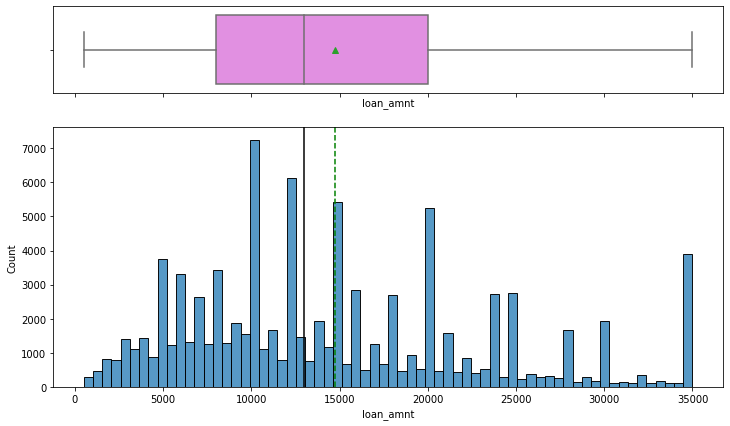

<IPython.core.display.Javascript object>

In [335]:
histogram_boxplot(loantrain, "loan_amnt")

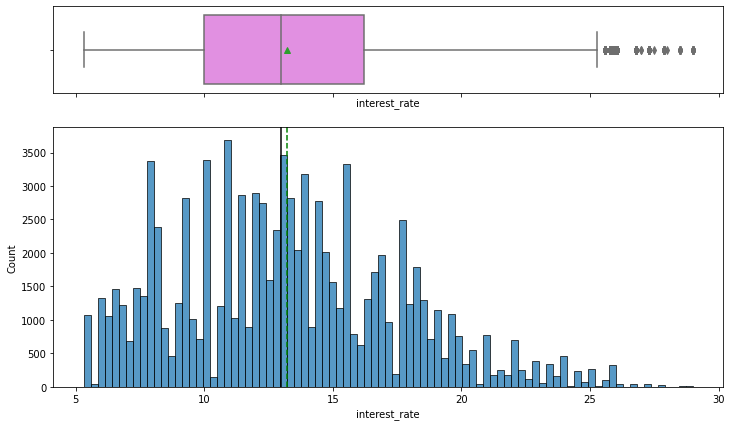

<IPython.core.display.Javascript object>

In [336]:
histogram_boxplot(loantrain, "interest_rate")

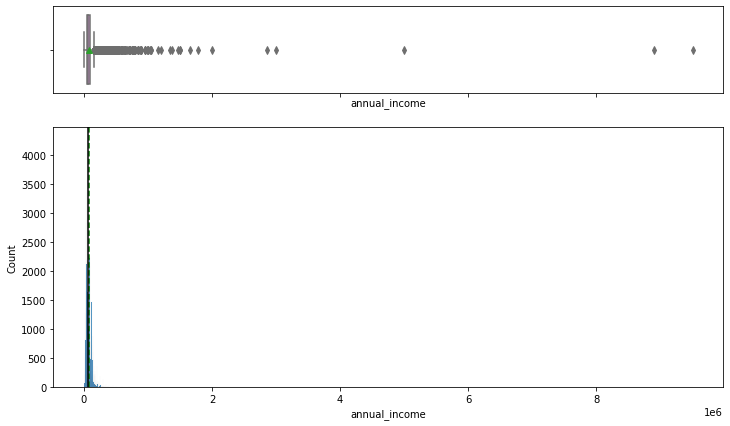

<IPython.core.display.Javascript object>

In [337]:
histogram_boxplot(loantrain, "annual_income")

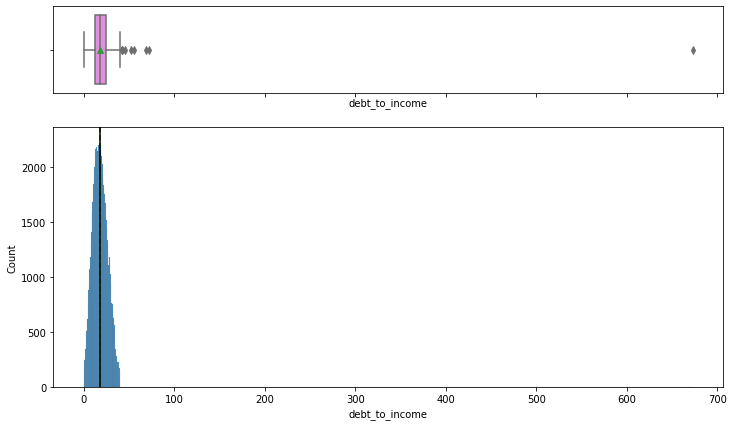

<IPython.core.display.Javascript object>

In [338]:
histogram_boxplot(loantrain, "debt_to_income")

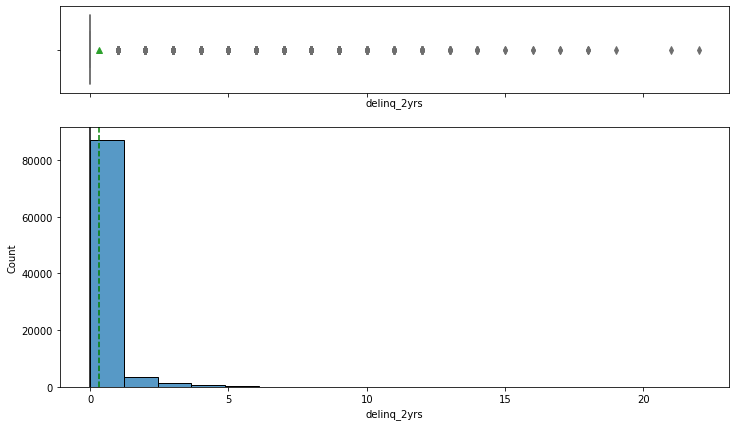

<IPython.core.display.Javascript object>

In [339]:
histogram_boxplot(loantrain, "delinq_2yrs")

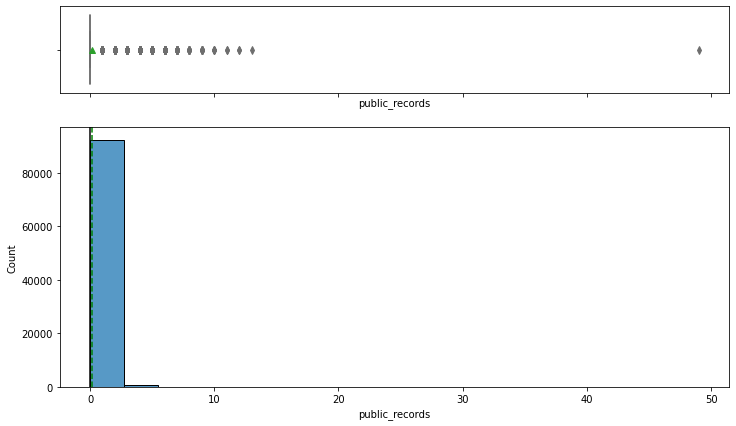

<IPython.core.display.Javascript object>

In [340]:
histogram_boxplot(loantrain, "public_records")

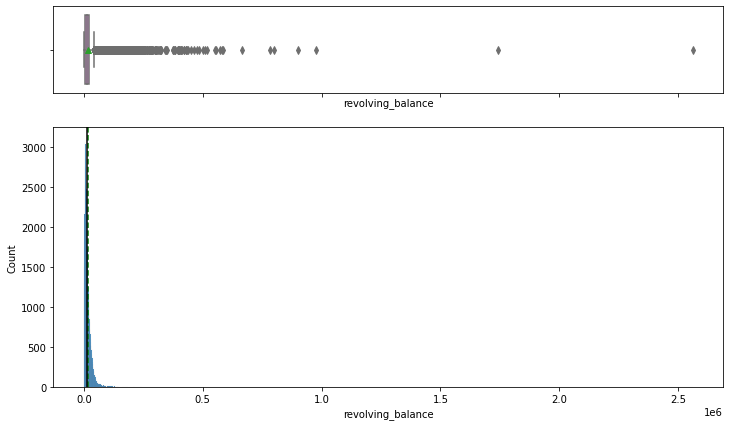

<IPython.core.display.Javascript object>

In [341]:
histogram_boxplot(loantrain, "revolving_balance")

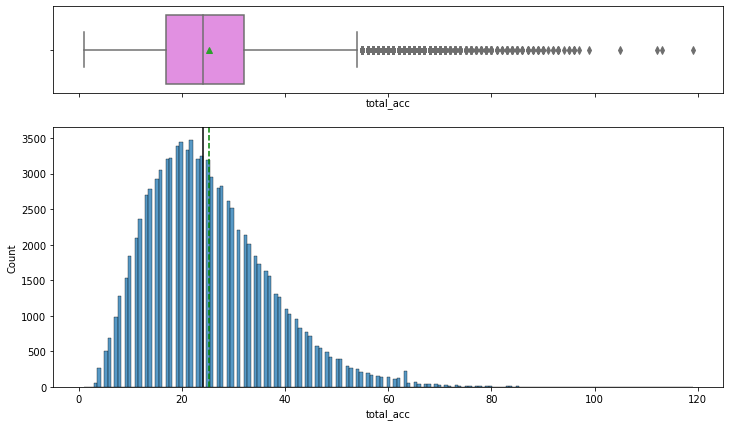

<IPython.core.display.Javascript object>

In [342]:
histogram_boxplot(loantrain, "total_acc")

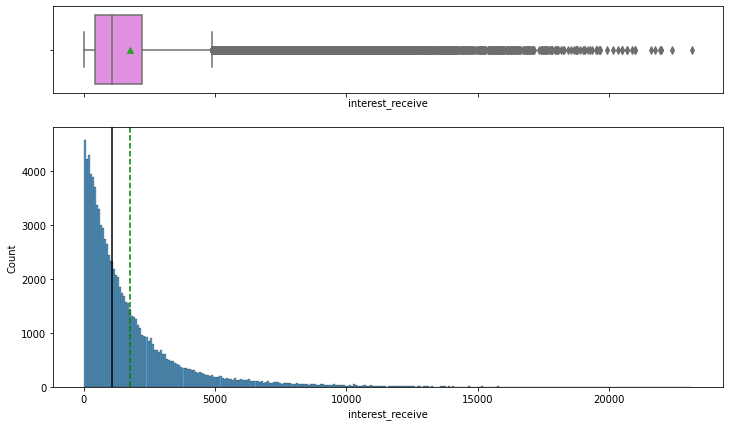

<IPython.core.display.Javascript object>

In [343]:
histogram_boxplot(loantrain, "interest_receive")

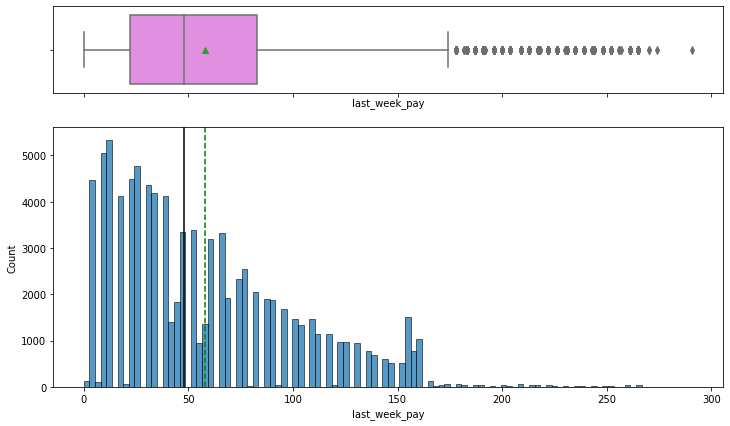

<IPython.core.display.Javascript object>

In [344]:
histogram_boxplot(loantrain, "last_week_pay")

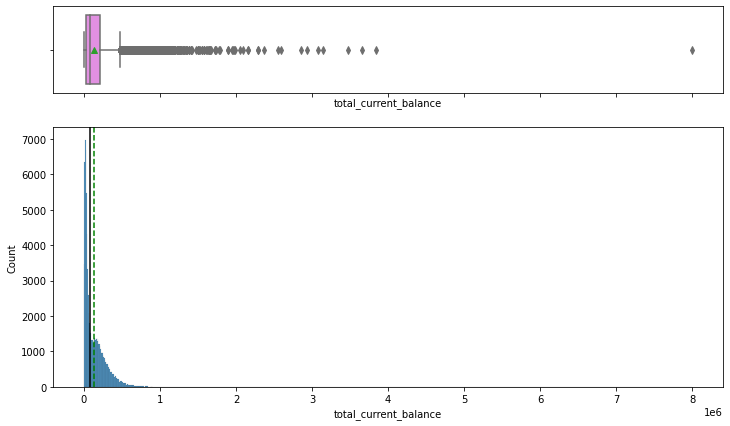

<IPython.core.display.Javascript object>

In [345]:
histogram_boxplot(loantrain, "total_current_balance")

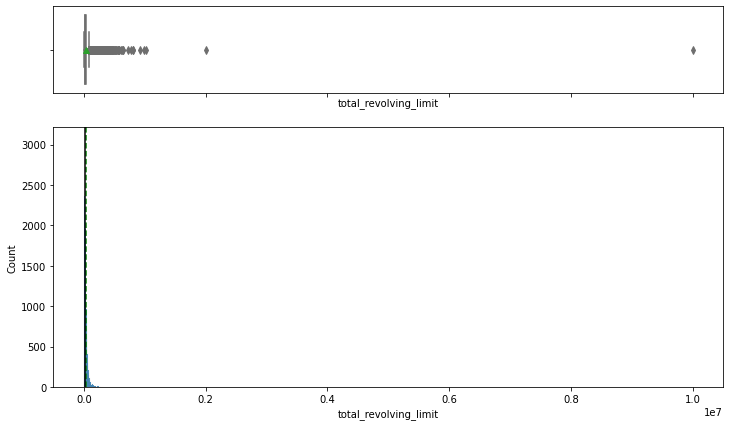

<IPython.core.display.Javascript object>

In [346]:
histogram_boxplot(loantrain, "total_revolving_limit")

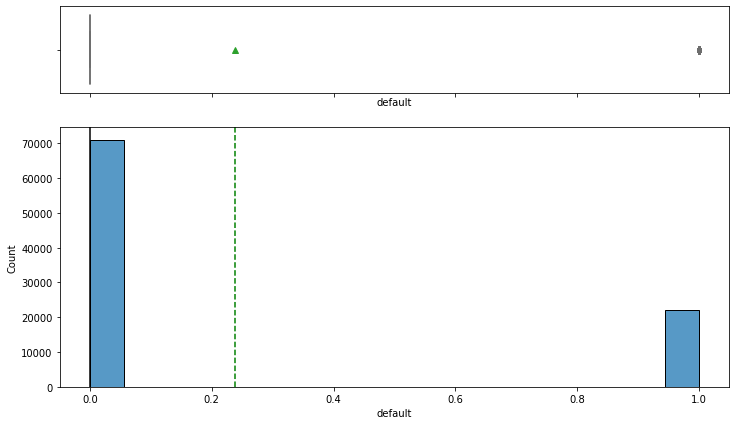

<IPython.core.display.Javascript object>

In [347]:
histogram_boxplot(loantrain, "default")

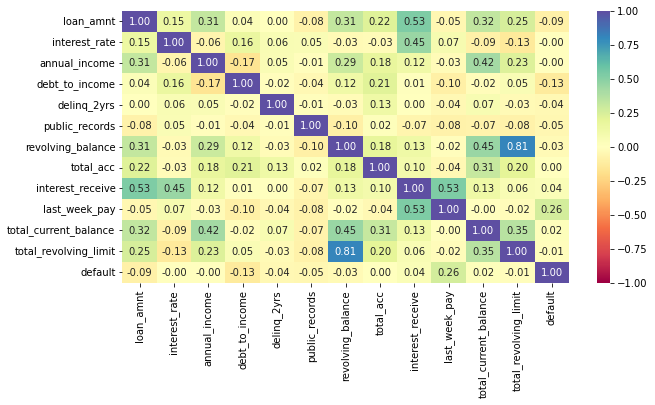

<IPython.core.display.Javascript object>

In [348]:
cols_list = loantrain.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    loantrain[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)  ## Code to find the correlation between the variables
plt.show()

The feature "revolving_balance" is highly correlated with the feature, "total_revolving_limit". interest_receive is somewhat correlated with loan_amnt.
interest_receive is somewhat correlated with last_week_pay

In [349]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

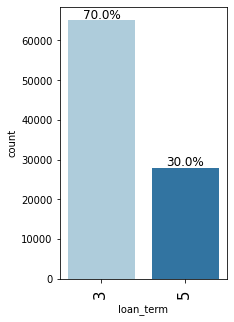

<IPython.core.display.Javascript object>

In [350]:
labeled_barplot(loantrain, "loan_term", perc=True)

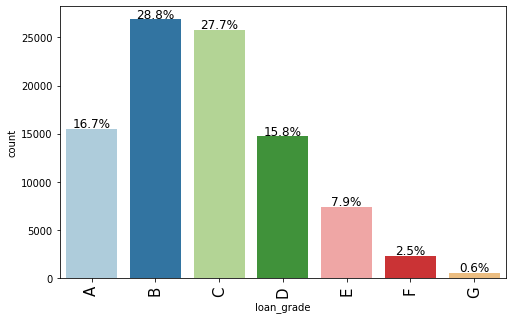

<IPython.core.display.Javascript object>

In [351]:
labeled_barplot(loantrain, "loan_grade", perc=True)

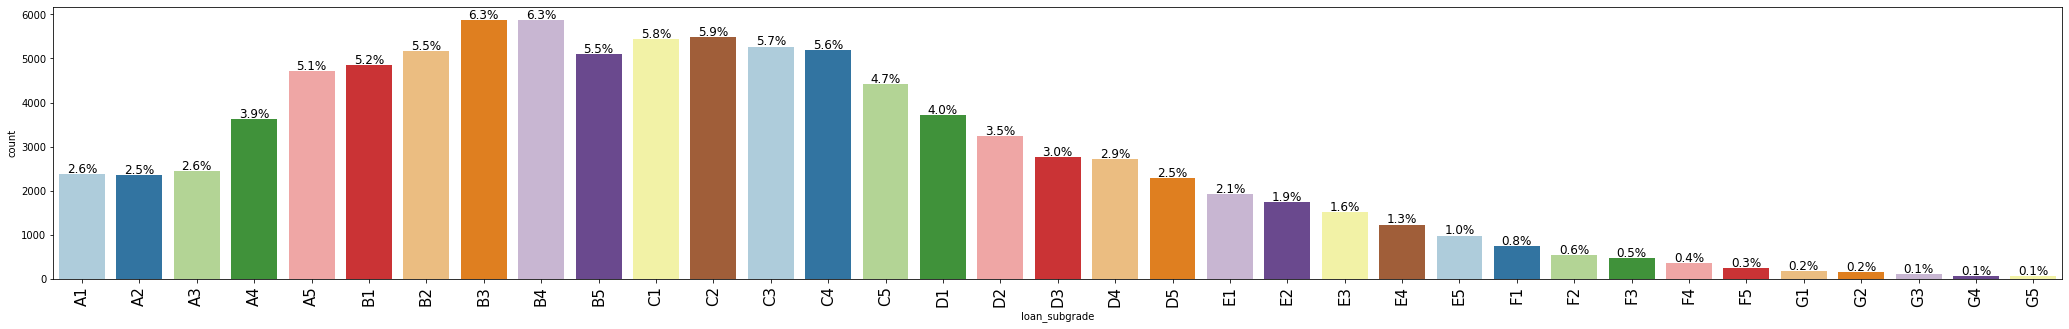

<IPython.core.display.Javascript object>

In [352]:
labeled_barplot(loantrain, "loan_subgrade", perc=True)

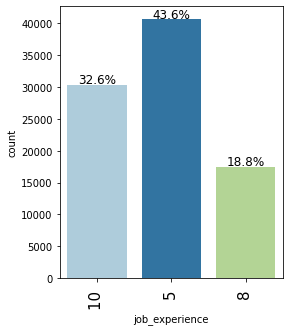

<IPython.core.display.Javascript object>

In [353]:
labeled_barplot(loantrain, "job_experience", perc=True)

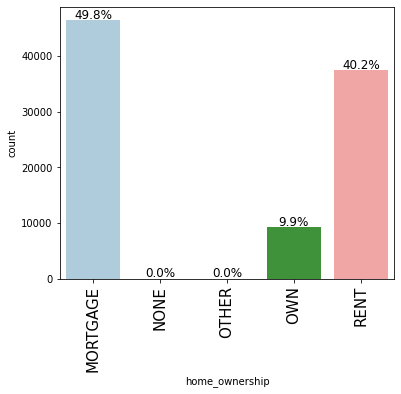

<IPython.core.display.Javascript object>

In [354]:
labeled_barplot(loantrain, "home_ownership", perc=True)

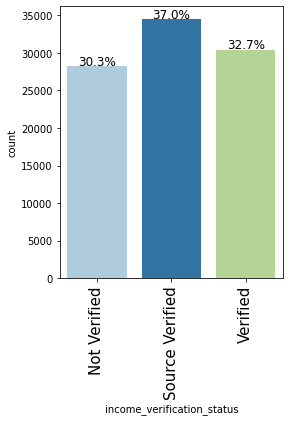

<IPython.core.display.Javascript object>

In [355]:
labeled_barplot(loantrain, "income_verification_status", perc=True)

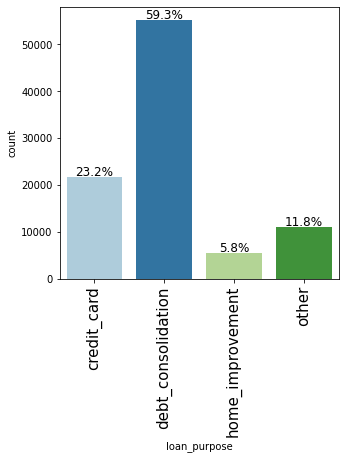

<IPython.core.display.Javascript object>

In [356]:
labeled_barplot(loantrain, "loan_purpose", perc=True)

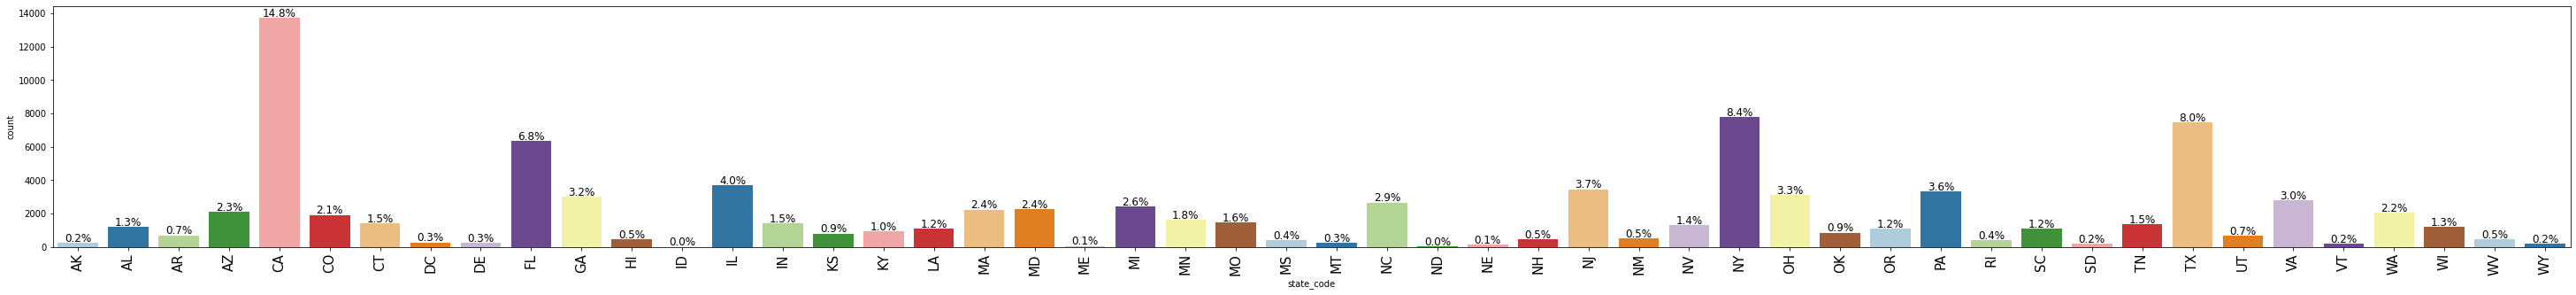

<IPython.core.display.Javascript object>

In [357]:
labeled_barplot(loantrain, "state_code", perc=True)

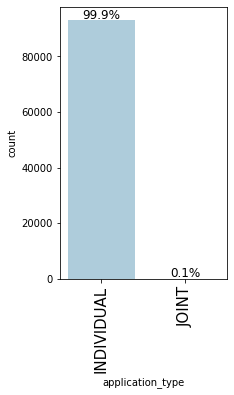

<IPython.core.display.Javascript object>

In [358]:
labeled_barplot(loantrain, "application_type", perc=True)

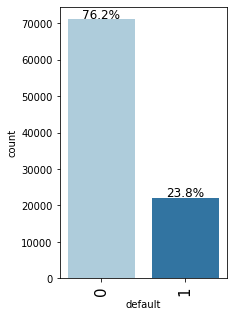

<IPython.core.display.Javascript object>

In [359]:
labeled_barplot(loantrain, "default", perc=True)

In [360]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [361]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

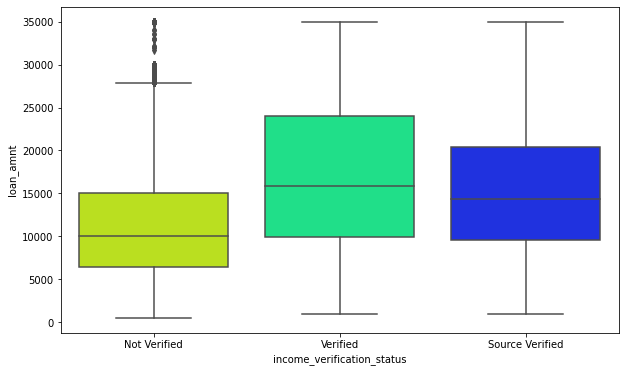

<IPython.core.display.Javascript object>

In [362]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=loantrain, x="income_verification_status", y="loan_amnt", palette="gist_rainbow"
)
plt.show()

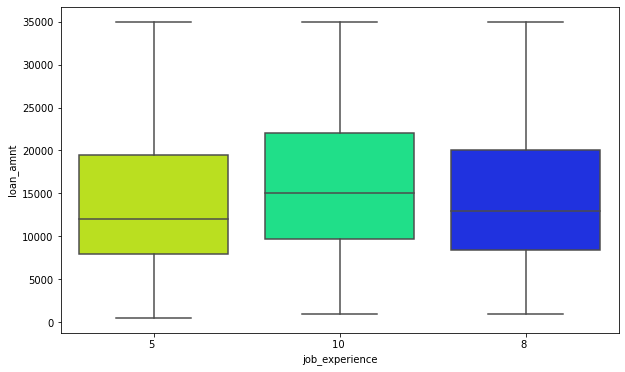

<IPython.core.display.Javascript object>

In [363]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=loantrain, x="job_experience", y="loan_amnt", palette="gist_rainbow"
)
plt.show()

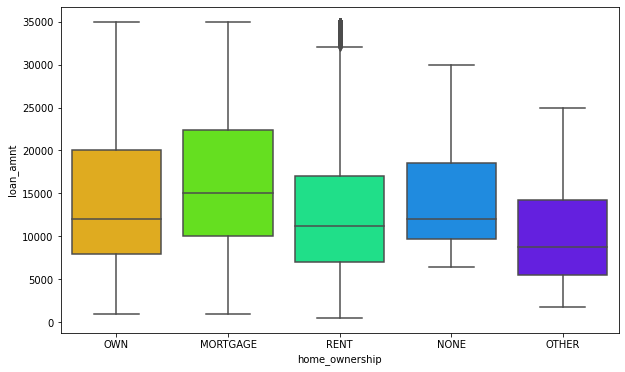

<IPython.core.display.Javascript object>

In [364]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=loantrain, x="home_ownership", y="loan_amnt", palette="gist_rainbow"
)
plt.show()

default         0      1    All
loan_grade                     
All         71045  22129  93174
B           19787   7078  26865
C           20203   5584  25787
A           11281   4253  15534
D           11478   3237  14715
E            6003   1375   7378
F            1862    482   2344
G             431    120    551
------------------------------------------------------------------------------------------------------------------------


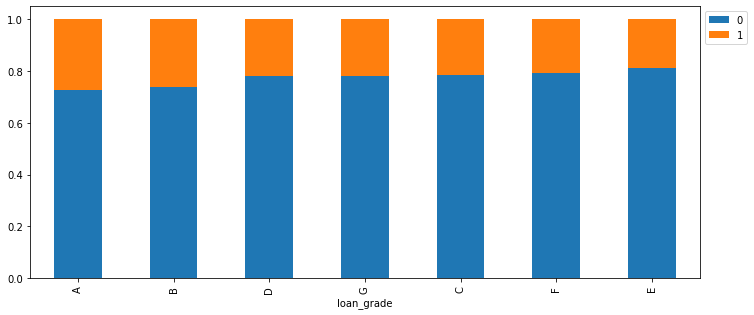

<IPython.core.display.Javascript object>

In [365]:
stacked_barplot(loantrain, "loan_grade", "default")

default          0      1    All
delinq_2yrs                     
All          71045  22127  93172
0.0          56778  18537  75315
1.0           9345   2457  11802
2.0           2812    698   3510
3.0           1093    239   1332
4.0            446    103    549
5.0            223     45    268
6.0            124     18    142
7.0             73     11     84
8.0             51      7     58
9.0             31      4     35
12.0            12      3     15
10.0            17      2     19
13.0             8      1      9
16.0             1      1      2
22.0             0      1      1
14.0             7      0      7
15.0             2      0      2
17.0             2      0      2
18.0             3      0      3
19.0             1      0      1
21.0             1      0      1
11.0            15      0     15
------------------------------------------------------------------------------------------------------------------------


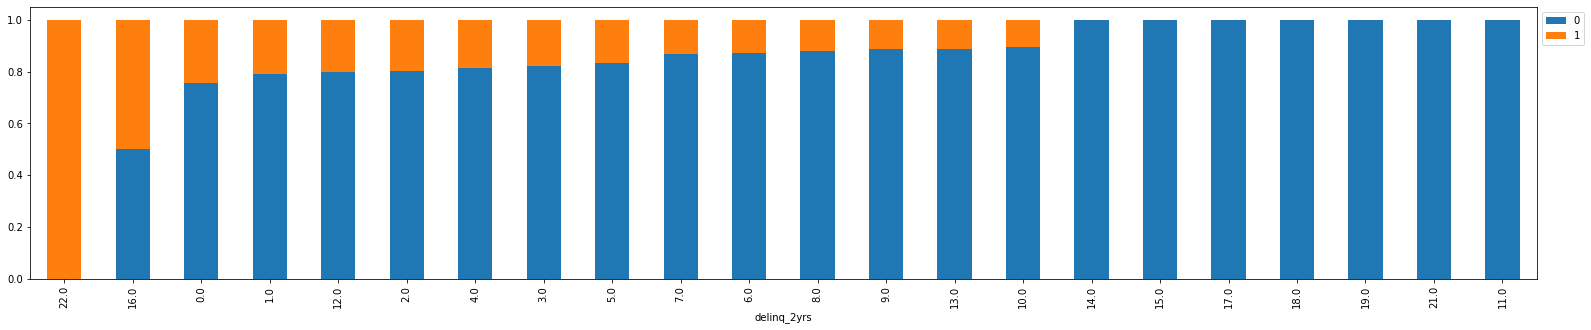

<IPython.core.display.Javascript object>

In [366]:
stacked_barplot(loantrain, "delinq_2yrs", "default")

default               0      1    All
application_type                     
INDIVIDUAL        70989  22129  93118
All               71045  22129  93174
JOINT                56      0     56
------------------------------------------------------------------------------------------------------------------------


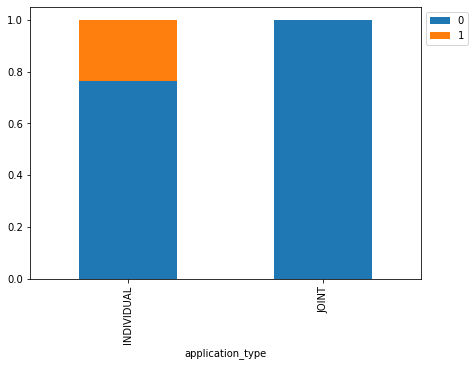

<IPython.core.display.Javascript object>

In [367]:
stacked_barplot(loantrain, "application_type", "default")

default                 0      1    All
loan_purpose                           
All                 71045  22129  93174
debt_consolidation  42408  12833  55241
credit_card         17006   4565  21571
other                7563   3408  10971
home_improvement     4068   1323   5391
------------------------------------------------------------------------------------------------------------------------


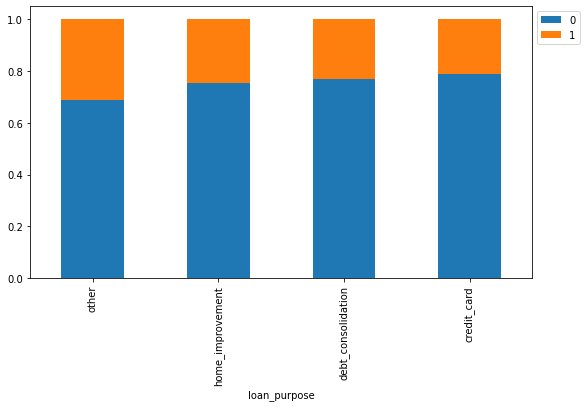

<IPython.core.display.Javascript object>

In [368]:
stacked_barplot(loantrain, "loan_purpose", "default")

default                         0      1    All
income_verification_status                     
All                         71045  22129  93174
Not Verified                20329   7908  28237
Verified                    22654   7796  30450
Source Verified             28062   6425  34487
------------------------------------------------------------------------------------------------------------------------


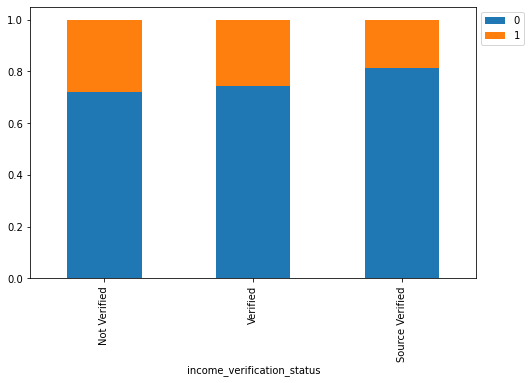

<IPython.core.display.Javascript object>

In [369]:
stacked_barplot(loantrain, "income_verification_status", "default")

default            0      1    All
loan_subgrade                     
All            71045  22129  93174
B3              4196   1683   5879
B4              4335   1544   5879
B2              3750   1419   5169
C1              4152   1291   5443
B5              3837   1258   5095
C2              4264   1215   5479
B1              3669   1174   4843
A5              3558   1165   4723
A4              2502   1129   3631
C3              4150   1120   5270
C4              4161   1021   5182
C5              3476    937   4413
D1              2932    784   3716
D2              2462    777   3239
A3              1731    719   2450
D3              2114    645   2759
A2              1710    643   2353
A1              1780    597   2377
D4              2154    563   2717
D5              1816    468   2284
E1              1598    326   1924
E3              1206    307   1513
E2              1436    300   1736
E4               996    232   1228
E5               767    210    977
F1               590

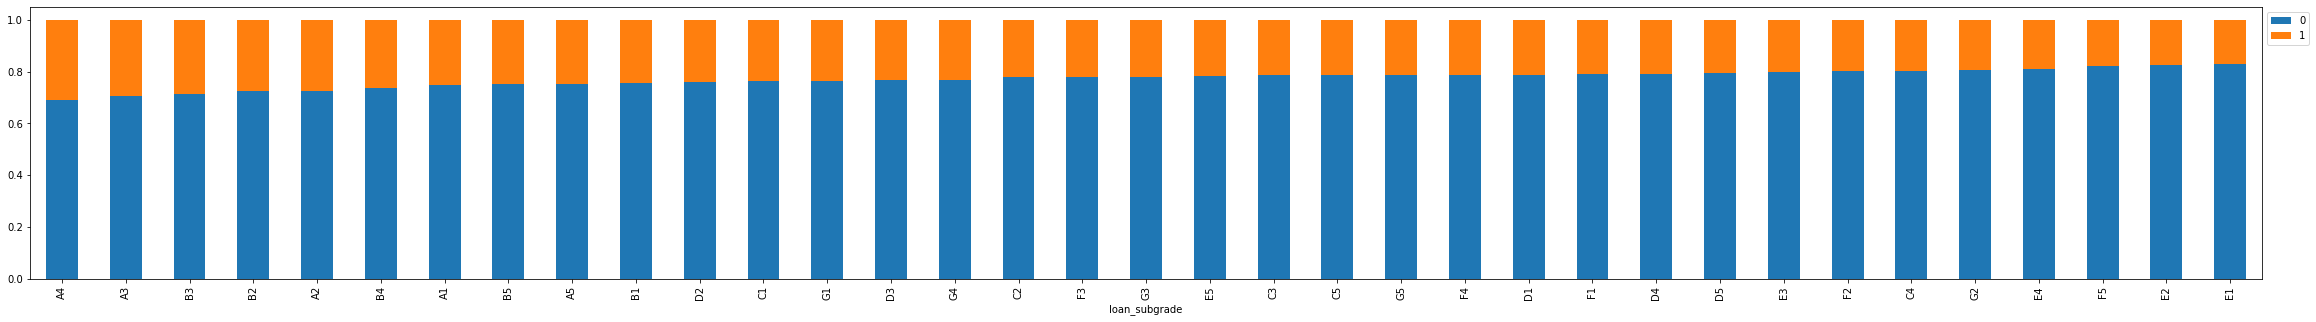

<IPython.core.display.Javascript object>

In [370]:
stacked_barplot(loantrain, "loan_subgrade", "default")

default        0      1    All
loan_term                     
All        71045  22129  93174
3          47345  17866  65211
5          23700   4263  27963
------------------------------------------------------------------------------------------------------------------------


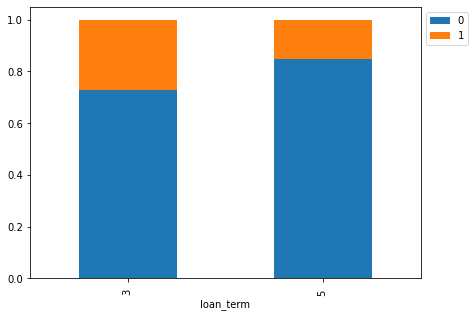

<IPython.core.display.Javascript object>

In [371]:
stacked_barplot(loantrain, "loan_term", "default")

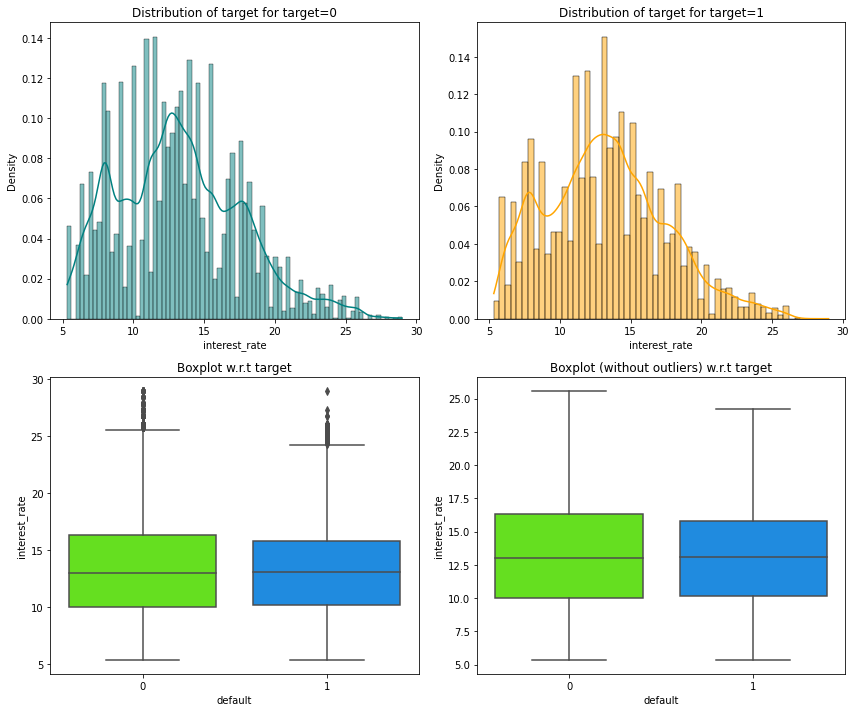

<IPython.core.display.Javascript object>

In [372]:
distribution_plot_wrt_target(loantrain, "interest_rate", "default")

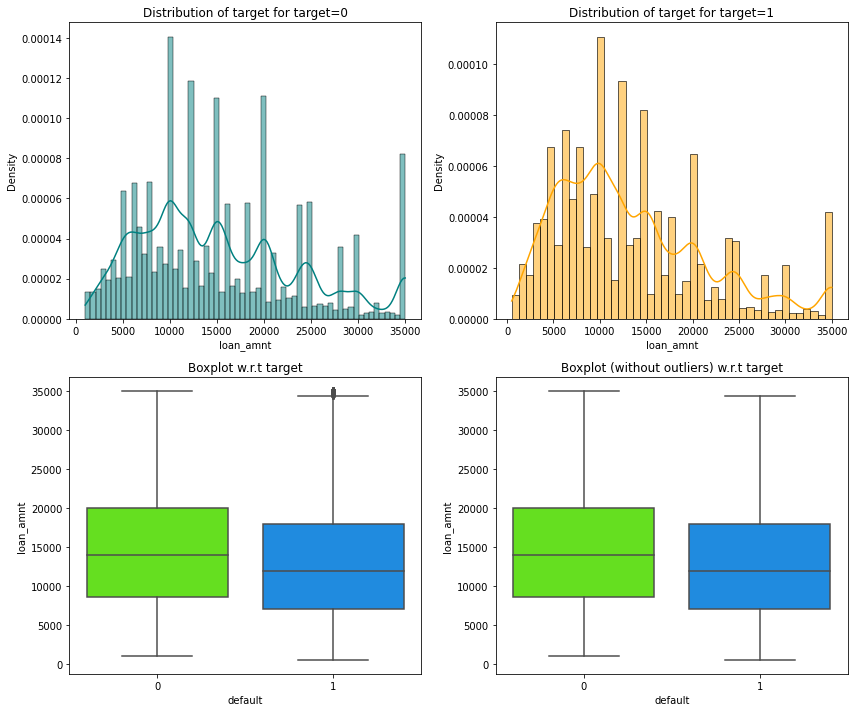

<IPython.core.display.Javascript object>

In [373]:
distribution_plot_wrt_target(loantrain, "loan_amnt", "default")

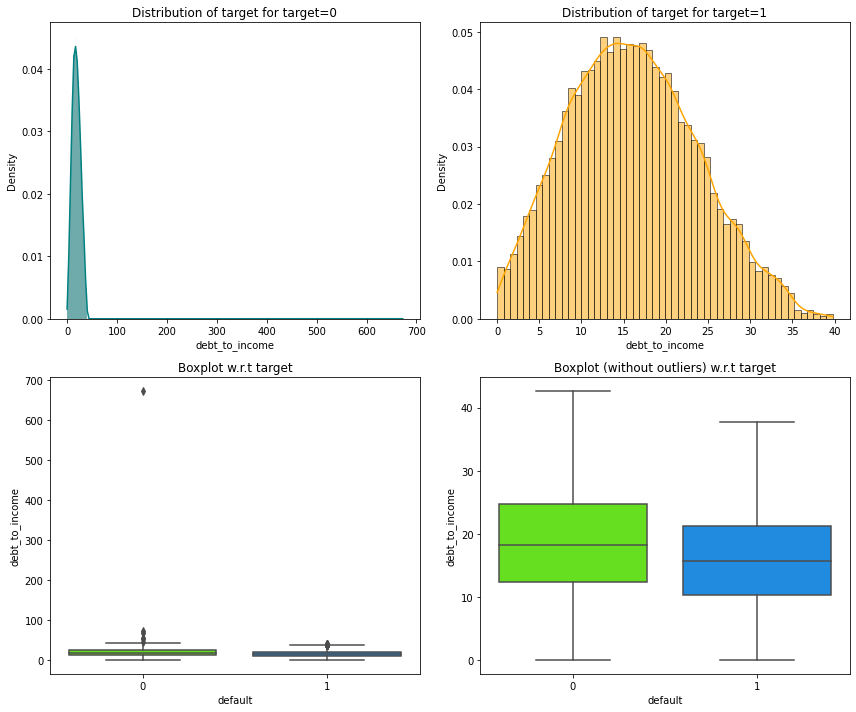

<IPython.core.display.Javascript object>

In [374]:
distribution_plot_wrt_target(loantrain, "debt_to_income", "default")

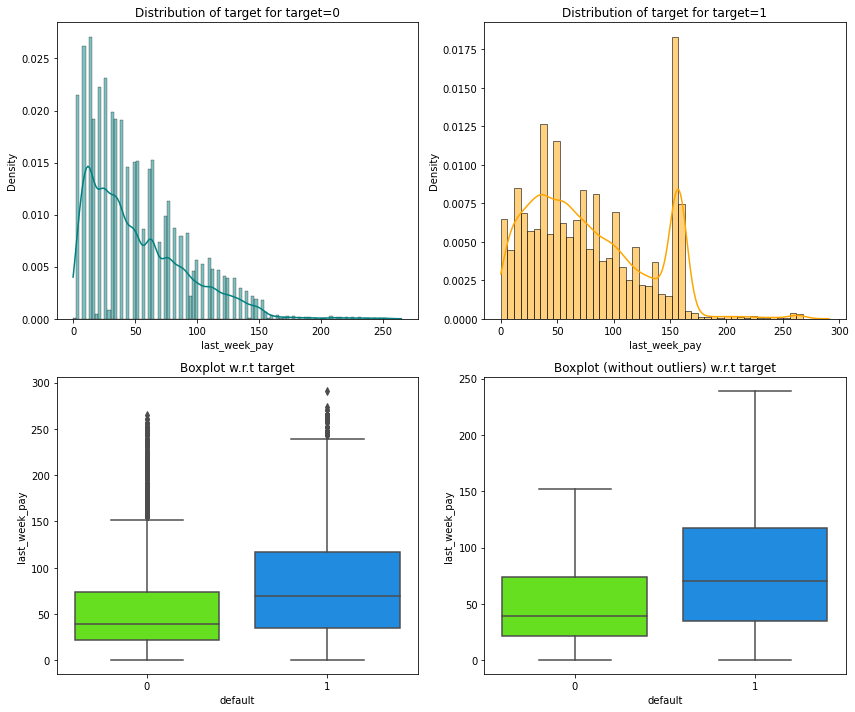

<IPython.core.display.Javascript object>

In [375]:
distribution_plot_wrt_target(loantrain, "last_week_pay", "default")

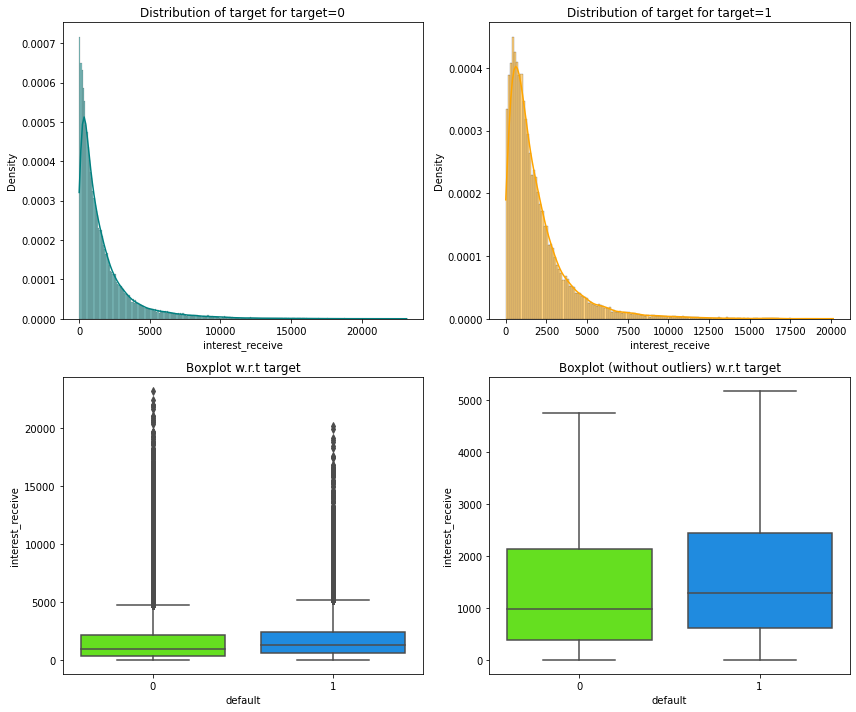

<IPython.core.display.Javascript object>

In [376]:
distribution_plot_wrt_target(loantrain, "interest_receive", "default")

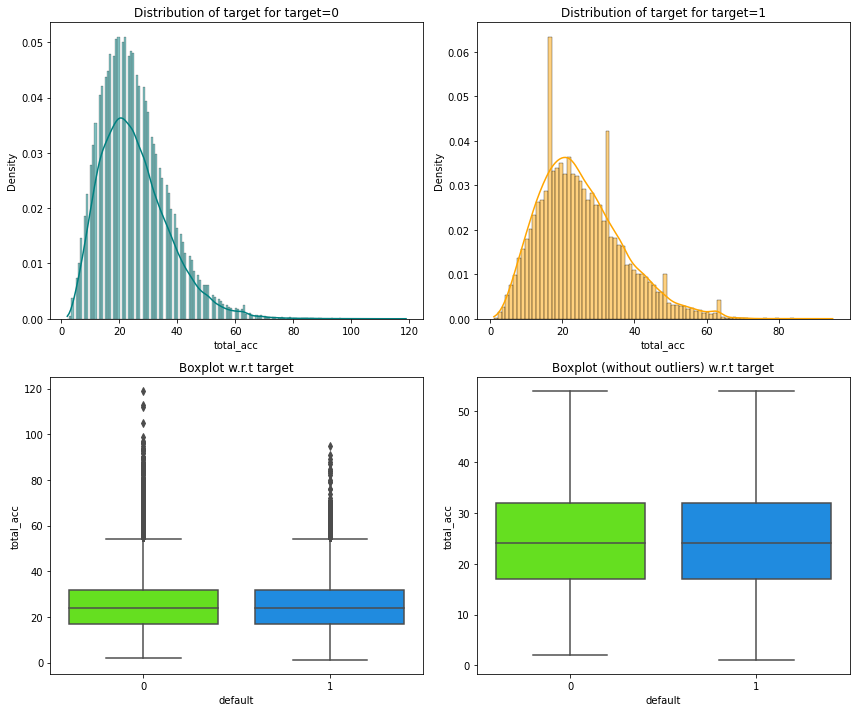

<IPython.core.display.Javascript object>

In [377]:
distribution_plot_wrt_target(loantrain, "total_acc", "default")

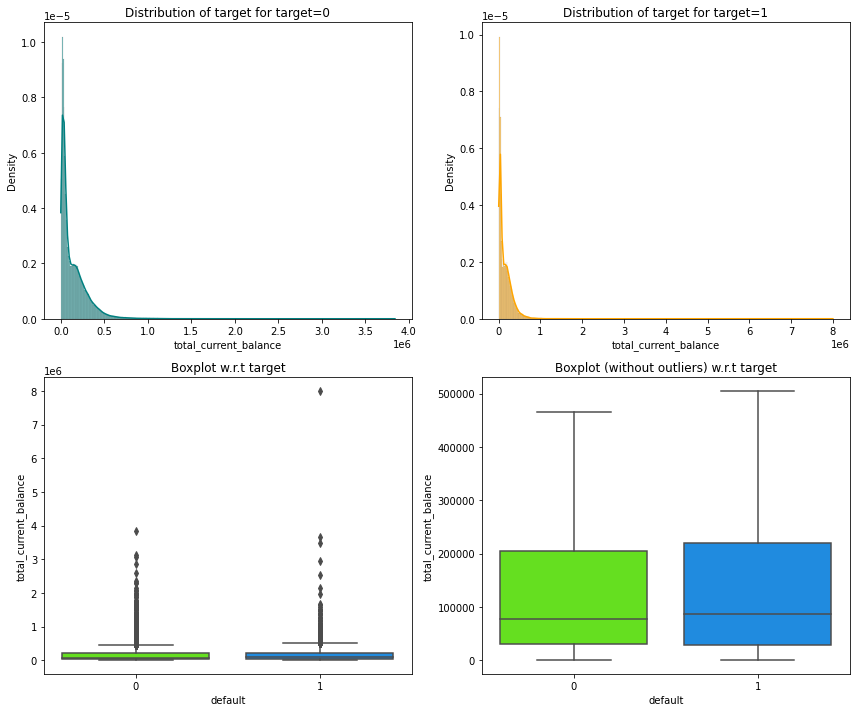

<IPython.core.display.Javascript object>

In [378]:
distribution_plot_wrt_target(loantrain, "total_current_balance", "default")

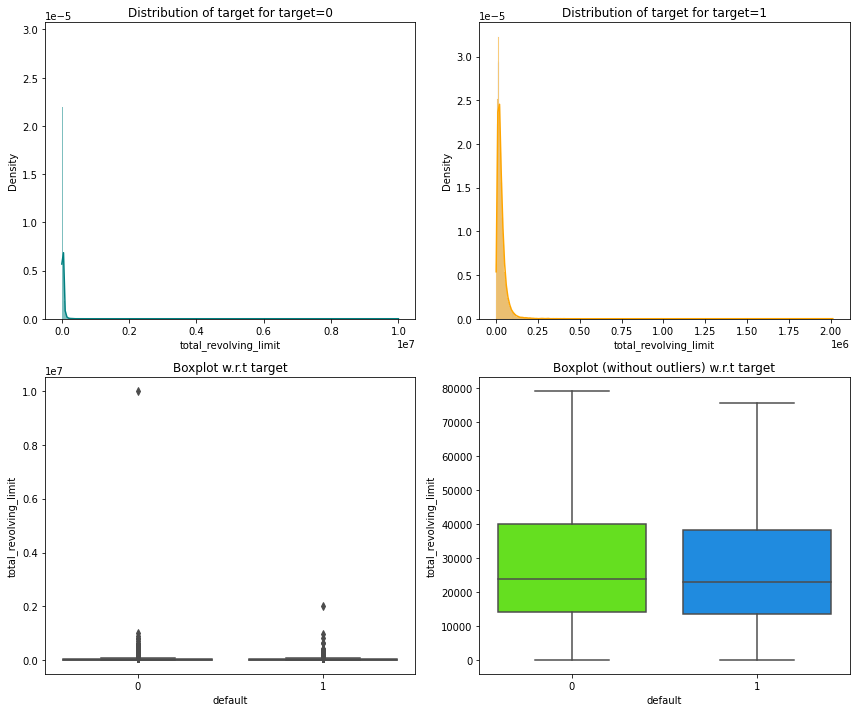

<IPython.core.display.Javascript object>

In [379]:
distribution_plot_wrt_target(loantrain, "total_revolving_limit", "default")

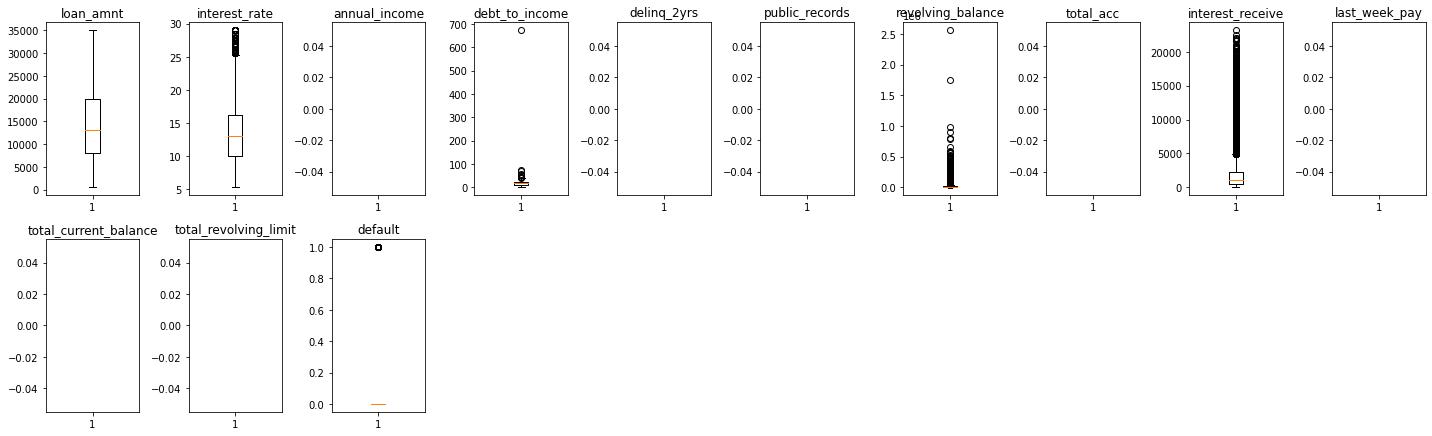

<IPython.core.display.Javascript object>

In [380]:
# outlier detection using boxplot for train dataset
numeric_columns = loantrain.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(10, 10, i + 1)
    plt.boxplot(loantrain[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)  ## Code to create boxplots for all the numeric columns
plt.show()

In [381]:
#The count of unique values in the dataset, "loantrain"
loantrain['default'].value_counts()

0    71045
1    22129
Name: default, dtype: int64

<IPython.core.display.Javascript object>

It's not neccessary to treat outiers, because as tested, it affected modeling.

Model Building

In [382]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [383]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [384]:
#loantrain["default"] = loantrain["default"].apply(lambda x: 1 if x == "default" else 0)

X = loantrain.drop(["default"], axis=1)
X = pd.get_dummies(X, drop_first=True)
Y = loantrain["default"]

#Using dummy variables for the loantest dataset
X_test1 = loantest ##  No target variable for test data
X_test1 = pd.get_dummies(X_test1, drop_first=True)
#y_test1 = loantest["default"] ##  Code to store target variable in y_test

<IPython.core.display.Javascript object>

In [385]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(55904, 114) (18635, 114) (18635, 114)


<IPython.core.display.Javascript object>

In [386]:
print(y_train.shape, y_val.shape, y_test.shape)

(55904,) (18635,) (18635,)


<IPython.core.display.Javascript object>

In [387]:
print("Shape of Training set : ", X_train.shape)
print("Shape of validation set : ", X_val.shape)
print("Shape of testing set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Shape of Training set :  (55904, 114)
Shape of validation set :  (18635, 114)
Shape of testing set :  (18635, 114)
Percentage of classes in training set:
0   0.763
1   0.237
Name: default, dtype: float64
Percentage of classes in validation set:
0   0.762
1   0.238
Name: default, dtype: float64
Percentage of classes in test set:
0   0.762
1   0.238
Name: default, dtype: float64


<IPython.core.display.Javascript object>

In [388]:
#Imputation transformer for completing missing values
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

In [389]:
#Imputation transformer for completing missing values
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_test1)

X_test1 = impute.transform(X_test1)

<IPython.core.display.Javascript object>

In [390]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

In [391]:
#Running models on the Original dataset
models = []  # Empty list to store all the models

# Appending models into the list
#models.append(("knn", KNeighborsClassifier(n_neighbors=3)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
#models.append(('lgr', LogisticRegression(random_state=1)))
#models.append(('rf', RandomForestClassifier(random_state=1)))
#models.append(('bagg', BaggingClassifier(random_state=1)))
#models.append(('gb', GradientBoostingClassifier(random_state=1)))
#models.append(('boost', AdaBoostClassifier(random_state=1)))
models.append(('xgb', XGBClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

dtree: 0.5540405690558845
[10:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:56] WARNING:

<IPython.core.display.Javascript object>

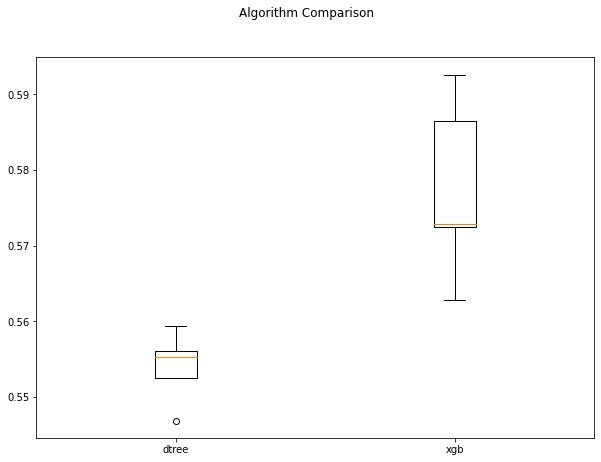

<IPython.core.display.Javascript object>

In [392]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

In [393]:
# Synthetic Minority Over Sampling Technique

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 13277
Before OverSampling, counts of label '0': 42627 

After OverSampling, counts of label '1': 42627
After OverSampling, counts of label '0': 42627 

After OverSampling, the shape of train_X: (85254, 114)
After OverSampling, the shape of train_y: (85254,) 



<IPython.core.display.Javascript object>

In [394]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(('xgb', XGBClassifier(random_state=1)))
results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

dtree: 0.8424942797019709
[10:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:30] WARNING:

<IPython.core.display.Javascript object>

In [395]:
# Defining model using the Oversampling technique training sets
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 2} with CV score=0.730831373827719:


<IPython.core.display.Javascript object>

In [397]:
# Creating new pipeline with best parameters
tuned_dtree1 = DecisionTreeClassifier(
    min_samples_leaf = 7, max_depth = 2, min_impurity_decrease=0.0001, max_leaf_nodes=10
) ## Code with the best parameters obtained from tuning

tuned_dtree1.fit(X_train_over, y_train_over) ## Code to fit the model on oversampled data

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

<IPython.core.display.Javascript object>

In [398]:
dtreeOver_train_perf = model_performance_classification_sklearn(tuned_dtree1, X_train_over,y_train_over)
dtreeOver_train_perf

,Accuracy,Recall,Precision,F1
0,0.617,0.899,0.575,0.701


<IPython.core.display.Javascript object>

In [399]:
dtreeOver_val_perf =  model_performance_classification_sklearn(tuned_dtree1, X_val, y_val) ## Code to check the performance on validation set
dtreeOver_val_perf

,Accuracy,Recall,Precision,F1
0,0.445,0.810,0.274,0.409


<IPython.core.display.Javascript object>

In [400]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9522111436950146:


<IPython.core.display.Javascript object>

In [401]:
xgb_tuned1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample= 0.9,
    scale_pos_weight= 10,
    n_estimators= 150,
    learning_rate= 0.1,
    gamma= 3,
)## Code with the best parameters obtained from tuning

xgb_tuned1.fit(X_train_over, y_train_over) ## Code to fit the model on over sampled data

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [402]:
xgb2Over_train_perf =  model_performance_classification_sklearn(
    xgb_tuned1, X_train_over, y_train_over) ## Complete the code to check the performance on oversampled train set
xgb2Over_train_perf

,Accuracy,Recall,Precision,F1
0,0.771,0.991,0.688,0.812


<IPython.core.display.Javascript object>

In [403]:
xgb2Over_val_perf =  model_performance_classification_sklearn(
    xgb_tuned1, X_val, y_val) ## Complete the code to check the performance on validation set
xgb2Over_val_perf

,Accuracy,Recall,Precision,F1
0,0.619,0.934,0.378,0.538


<IPython.core.display.Javascript object>

In [404]:
#Undersampling
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 13277
Before UnderSampling, counts of label '0': 42627 

After UnderSampling, counts of label '1': 13277
After UnderSampling, counts of label '0': 13277 

After UnderSampling, the shape of train_X: (26554, 114)
After UnderSampling, the shape of train_y: (26554,) 



<IPython.core.display.Javascript object>

In [405]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(('xgb', XGBClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

dtree: 0.6885596056542554
[13:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:40] WARNING:

<IPython.core.display.Javascript object>

In [406]:
#Hyperparameter for the Undersampled technique
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7], 
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.6315458727565629:


<IPython.core.display.Javascript object>

In [407]:
# Creating new pipeline with best parameters
tuned_dtree2 = DecisionTreeClassifier(
    min_samples_leaf = 1, max_depth = 2, min_impurity_decrease=0.001, max_leaf_nodes=5
) ## Code with the best parameters obtained from tuning

tuned_dtree2.fit(X_train_un,y_train_un) ## Code to fit the model on oversampled data

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.001)

<IPython.core.display.Javascript object>

In [ ]:
dtreeUnder_train_perf = model_performance_classification_sklearn(tuned_dtree2, X_train_un,y_train_un)
dtreeUnder_train_perf

,Accuracy,Recall,Precision,F1
0,0.614,0.639,0.609,0.624


<IPython.core.display.Javascript object>

In [408]:
dtreeUnder_val_perf =  model_performance_classification_sklearn(tuned_dtree2, X_val, y_val) ## Code to check the performance on validation set
dtreeUnder_val_perf

,Accuracy,Recall,Precision,F1
0,0.597,0.647,0.325,0.433


<IPython.core.display.Javascript object>

In [409]:
#XGBoosting
#%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9830532582306628:


<IPython.core.display.Javascript object>

In [410]:
xgb_tuned2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample= 0.9,
    scale_pos_weight= 10,
    n_estimators= 150,
    learning_rate= 0.1,
    gamma= 3,
)## Code with the best parameters obtained from tuning

xgb_tuned2.fit(X_train_un, y_train_un) ## Code to fit the model on over sampled data

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [411]:
xgb2Under_train_perf =  model_performance_classification_sklearn(
    xgb_tuned2, X_train_un, y_train_un) ## Code to check the performance on oversampled train set
xgb2Under_train_perf

,Accuracy,Recall,Precision,F1
0,0.642,0.999,0.583,0.736


<IPython.core.display.Javascript object>

In [412]:
xgb2Under_val_perf =  model_performance_classification_sklearn(
    xgb_tuned2, X_val, y_val) ## Code to check the performance on validation set
xgb2Under_val_perf

,Accuracy,Recall,Precision,F1
0,0.408,0.986,0.285,0.442


<IPython.core.display.Javascript object>

In [414]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtreeOver_train_perf.T,
        dtreeUnder_train_perf.T,
        xgb2Over_train_perf.T,
        xgb2Under_train_perf.T,
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Oversampled",
    "Decision Tree Undersampled",
    "XGBoost Tree Oversampled",
    "XGBoost Classifier Undersampled", 
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Oversampled,Decision Tree Undersampled,XGBoost Tree Oversampled,XGBoost Classifier Undersampled
Accuracy,0.617,0.614,0.771,0.642
Recall,0.899,0.639,0.991,0.999
Precision,0.575,0.609,0.688,0.583
F1,0.701,0.624,0.812,0.736


<IPython.core.display.Javascript object>

In [415]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        dtreeOver_val_perf.T,
        dtreeUnder_val_perf.T,
        xgb2Over_val_perf.T,
        xgb2Under_val_perf.T,
        
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree Oversampled",
    "Decision Tree Undersampled",
    "XGBoost Classifier Oversampled",
    "XGBoost Classifier Undersampled",
    
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree Oversampled,Decision Tree Undersampled,XGBoost Classifier Oversampled,XGBoost Classifier Undersampled
Accuracy,0.445,0.597,0.619,0.408
Recall,0.810,0.647,0.934,0.986
Precision,0.274,0.325,0.378,0.285
F1,0.409,0.433,0.538,0.442


<IPython.core.display.Javascript object>

In [416]:
#Test set final performance
#Testing the best model with testing data
xgbfinal_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned1, X_test, y_test
)
xgbfinal_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.617,0.923,0.376,0.534


<IPython.core.display.Javascript object>

In [417]:
#Testing the best model with testing data
dtreefinal_model_test_perf = model_performance_classification_sklearn(
    tuned_dtree1, X_test, y_test
)
dtreefinal_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.443,0.807,0.273,0.408


<IPython.core.display.Javascript object>

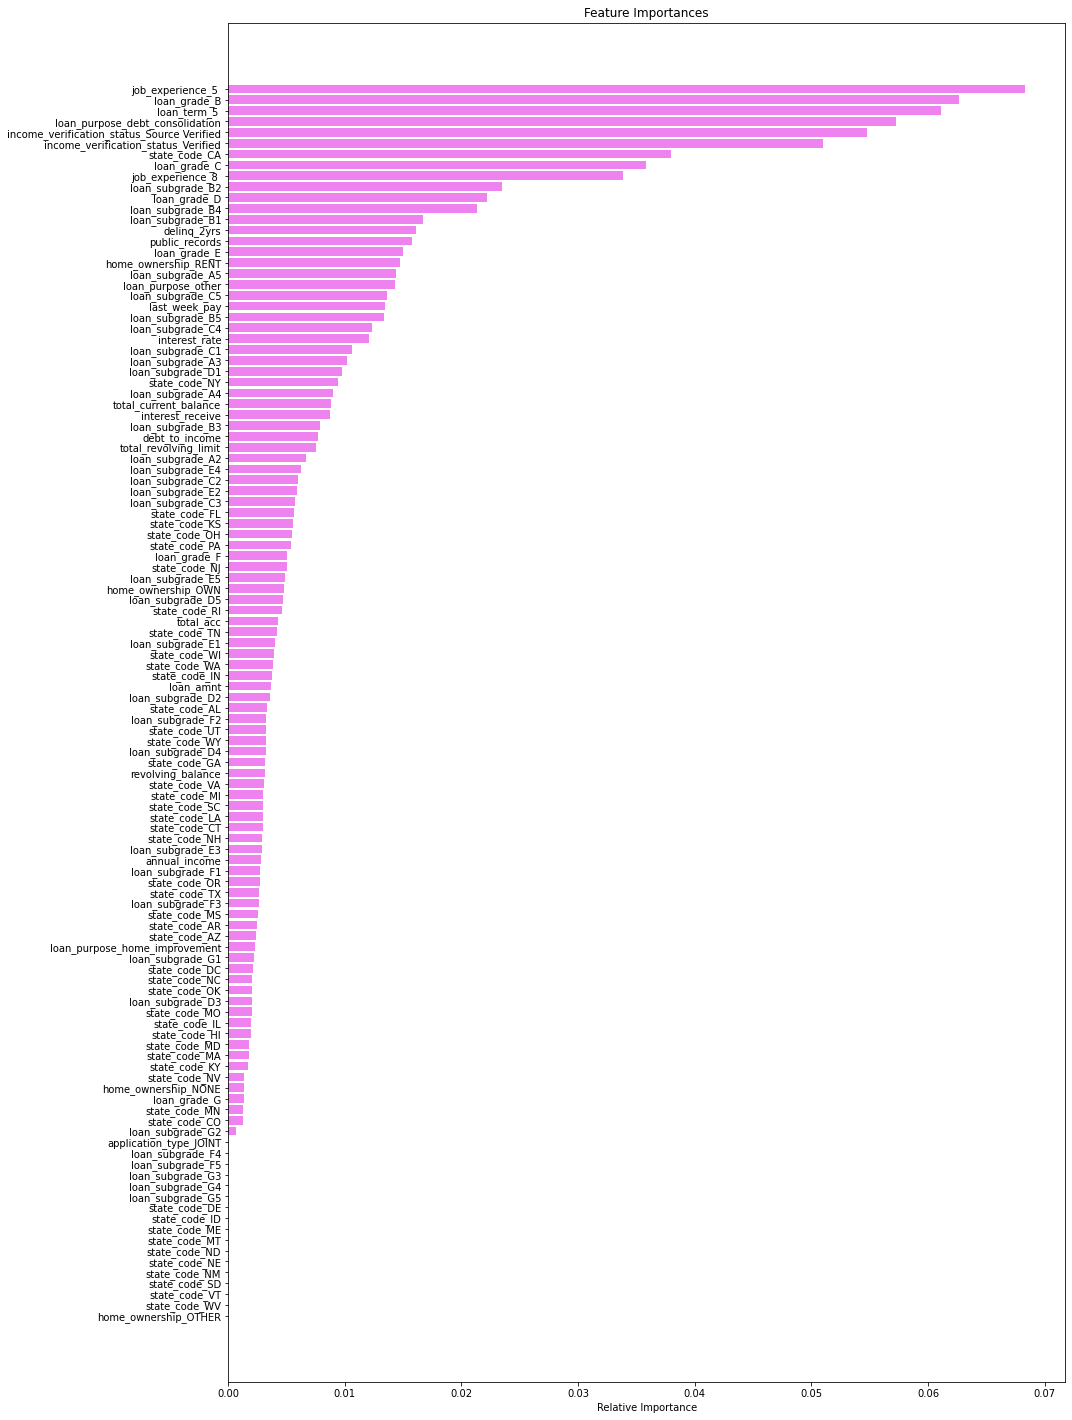

<IPython.core.display.Javascript object>

In [418]:
#Finding the feature importance for the XGBoosting algorithm
feature_names = X.columns
importances = xgb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 25))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

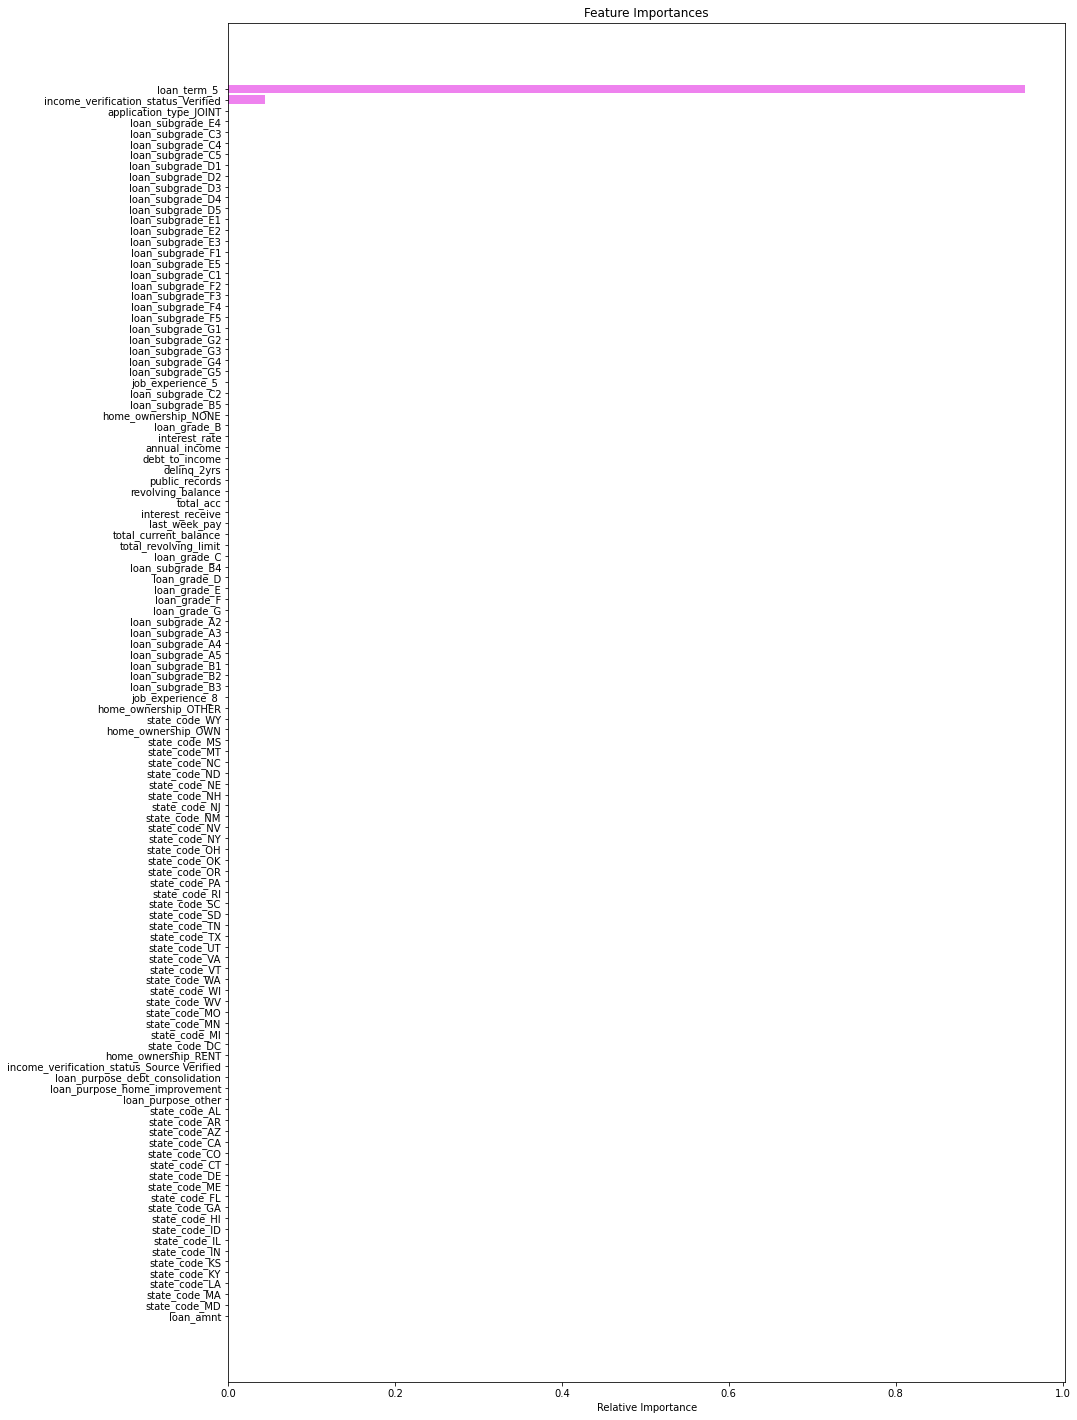

<IPython.core.display.Javascript object>

In [419]:
#Finding the feature importance for the Decision Tree algorithm
feature_names = X.columns
importances = tuned_dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 25))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#Test setting the Final performance model using the test_set as unseen data.

In [420]:
#Replacing years in the column, "loan_term" in order to have numeric values
df_train['loan_term'] = df_train['loan_term'].str.replace('years', "")

<IPython.core.display.Javascript object>

In [421]:
#Replacing < in the column, "job_experience" in order to have numeric values
df_train['job_experience'] = df_train['job_experience'].str.replace('<', "")

<IPython.core.display.Javascript object>

In [422]:
#Replacing Years with years in the column, "job_experience" in order to remove it completely
df_train['job_experience'] = df_train['job_experience'].str.replace('Years', "years")

<IPython.core.display.Javascript object>

In [423]:
#Replacing years in the column, "job_experience" in order to have numeric values
df_train['job_experience'] = df_train['job_experience'].str.replace('years', "")

<IPython.core.display.Javascript object>

In [424]:
#Replacing + in the column, "job_experience" in order to have numeric values
df_train['job_experience'] = df_train['job_experience'].str.replace('+', "")

<IPython.core.display.Javascript object>

In [425]:
#Replacing 6-10 in the column, "job_experience" with median numeric values
df_train['job_experience'] = df_train['job_experience'].str.replace('6-10', "8")

<IPython.core.display.Javascript object>

In [426]:
#We drop the column ID from the dataframe
df_train = df_train.drop("ID", axis=1)

<IPython.core.display.Javascript object>

In [427]:
# Separating target variable and other variables
X1 = df_train.drop(columns="default")
X1 = pd.get_dummies(X1, drop_first=True)
Y1 = df_train["default"]

<IPython.core.display.Javascript object>

In [428]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
##Imputation transformer for completing missing values
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)


<IPython.core.display.Javascript object>

In [429]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X1, Y1, test_size=0.25, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(69880, 114) (23294, 114)


<IPython.core.display.Javascript object>

In [430]:
# Synthetic Minority Over Sampling Technique

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 16597
Before OverSampling, counts of label '0': 53283 

After OverSampling, counts of label '1': 53283
After OverSampling, counts of label '0': 53283 

After OverSampling, the shape of train_X: (106566, 114)
After OverSampling, the shape of train_y: (106566,) 



<IPython.core.display.Javascript object>

In [431]:

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))


Before UnderSampling, counts of label '1': 16597
Before UnderSampling, counts of label '0': 53283 

After UnderSampling, counts of label '1': 16597
After UnderSampling, counts of label '0': 16597 

After UnderSampling, the shape of train_X: (33194, 114)
After UnderSampling, the shape of train_y: (33194,) 



<IPython.core.display.Javascript object>

In [432]:
#Using pipeline; I don't need to do SimpleImputer because I did it above.
Model = Pipeline(steps=[
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=150,
                scale_pos_weight=10,
                subsample=0.9,
                learning_rate=0.1,
                gamma=3,
                eval_metric="logloss",
                reg_lambda=1,
                max_depth=6,
            ),
        ),
    ] ) ## Code to create pipeline for the best model

<IPython.core.display.Javascript object>

In [433]:
Model.fit(X_train_over, y_train_over) ##  Code to fit the Model obtained from above step

Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=3, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=10, subsample=0.9,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

<IPython.core.display.Javascript object>

In [434]:
#Creating predictions on the test_set(This is provided and is unseen data)
y_test1 = Model.predict(X_test1)
print(y_test1)

[1 0 1 ... 0 1 0]


<IPython.core.display.Javascript object>

In [435]:
Model_test = model_performance_classification_sklearn(
    Model, X_test1, y_test1
) ## Code to check the performance on test set that is unseen data
Model_test

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

I cleaned the data by making sure that the features loan_term, and job_performance are numeric values. In this way, I can apply one hot encoding, and SimpleImputer.
Upon splitting the data, I got the training, validation and testing datasets, so I can test my models first using seen data. 
I built several models; however, Decision Trees and XGBoosting performed best. I also applied the Oversampling and Undersampling techniques on both models.
I used hyper-paramater tuning to improve the performance of the models mentioned. Results were compared as can be seen in the notebook.
I went on to use the original dataset (cleaned, applied one hot encoding, SimpleImputer, and Oversampling). The XGBoosting model was used to build the data. I also created a y_test set from the unseen data (X_test1) to get a target variable.

After doing the feature importance I can see that job_experience_5, loan_grade_B, loan_term_5, loan_purpose_debt_consolidation, and income_verification_status_source_verified are important features to take for decision making.

The results on seen data using XGBoosting oversampled:
Accuracy: 0.617
Recall: 0.923
Precision: 0.326
F1-score: 0.534

The results on unseen data using XGBoosting oversampled:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0
